In [4]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

trainin = pd.read_csv('data/train_in.csv', delimiter = ',', header=None)
print(trainin[:5])
trainout = pd.read_csv('data/train_out.csv', delimiter = ',', header=None)
print(trainout[:5])

   0    1    2      3      4      5      6      7      8      9    ...    246  \
0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 -0.167  ...  0.304   
1 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 -1.000  ... -0.671   
2 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.996  ... -1.000   
3 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450 -0.067  ... -0.318   
4 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  0.234  ...  0.466   

     247    248    249    250    251    252    253    254  255  
0  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  
1 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  
2 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  
3  1.000  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
4  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  

[5 rows x 256 columns]
   0
0  6
1  5
2  4
3  7
4  3


In [5]:
def group_and_calc_dist(data, labels, no1, no2):
    """
    Takes data (train or test in) and labels (train or test out) in a dataframe 
    and two numbers. Calculates the distance between the centers of those two numbers.
    """
    data['Label'] = labels
    average = data.groupby(['Label']).mean()
    average_dataonly = average.iloc[:, :-1]
    dist = np.linalg.norm(average_dataonly.iloc[[no1]].to_numpy() - average_dataonly.iloc[[no2]].to_numpy())
    
    return dist


for a in range(0, 10):
    for b in range(0, 10):
        print('Number one: ', a, ' Number two: ', b, ' Distance: ', group_and_calc_dist(trainin, trainout, a, b))

Number one:  0  Number two:  0  Distance:  0.0
Number one:  0  Number two:  1  Distance:  14.44960796590658
Number one:  0  Number two:  2  Distance:  9.33441361168075
Number one:  0  Number two:  3  Distance:  9.14373365671221
Number one:  0  Number two:  4  Distance:  10.769844437633486
Number one:  0  Number two:  5  Distance:  7.519295968885077
Number one:  0  Number two:  6  Distance:  8.154443125778972
Number one:  0  Number two:  7  Distance:  11.864555054634078
Number one:  0  Number two:  8  Distance:  9.907901737320392
Number one:  0  Number two:  9  Distance:  11.488874937417041
Number one:  1  Number two:  0  Distance:  14.44960796590658
Number one:  1  Number two:  1  Distance:  0.0
Number one:  1  Number two:  2  Distance:  10.125191428795594
Number one:  1  Number two:  3  Distance:  11.73323289000861
Number one:  1  Number two:  4  Distance:  10.173786431281787
Number one:  1  Number two:  5  Distance:  11.118800210867951
Number one:  1  Number two:  6  Distance:  10.61

In [6]:
pca = PCA(n_components = 2)
youmap = umap.UMAP()
tsne = TSNE()

tsnereduc = tsne.fit_transform(trainin)
umapreduc = youmap.fit_transform(trainin)
pcareduc = pca.fit_transform(trainin)
print(tsnereduc.shape, pcareduc.shape, umapreduc.shape)

(1707, 2) (1707, 2) (1707, 2)


<AxesSubplot:>

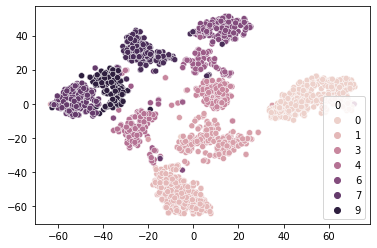

In [16]:
sns.scatterplot(x = tsnereduc[:, 0], y = tsnereduc[:, 1], hue = trainout[0])

<AxesSubplot:>

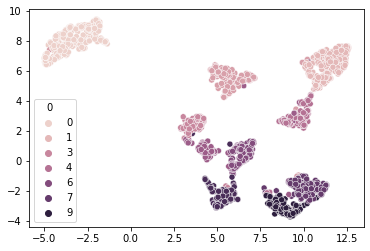

In [17]:
sns.scatterplot(x = umapreduc[:, 0], y = umapreduc[:, 1], hue = trainout[0])

<AxesSubplot:>

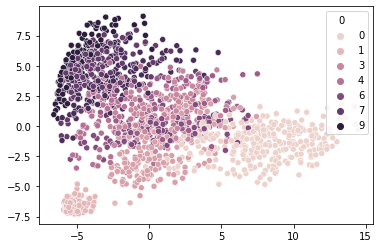

In [18]:
sns.scatterplot(x = pcareduc[:, 0], y = pcareduc[:, 1], hue = trainout[0])